In [1]:
## How polluted will your town air be? Pollution Level Forecasting
## Regression Problem
## Data ranges from year 2010 to 2014
## Data description
'''
https://www.airveda.com/blog/what-is-pm2-5-and-why-is-it-important
year: year of data in this row
month: month of data in this row
day: day of data in this row
hour: hour of data in this row
pm2.5: PM2.5 concentration (ug/m^3)
DEWP: Dew Point (â„ƒ)
TEMP: Temperature (â„ƒ)
PRES: Pressure (hPa)
cbwd: Combined wind direction
Iws: Cumulated wind speed (m/s)
Is: Cumulated hours of snow
Ir: Cumulated hours of rain

'''

'\nhttps://www.airveda.com/blog/what-is-pm2-5-and-why-is-it-important\nyear: year of data in this row\nmonth: month of data in this row\nday: day of data in this row\nhour: hour of data in this row\npm2.5: PM2.5 concentration (ug/m^3)\nDEWP: Dew Point (\xc3\xa2\xe2\x80\x9e\xc6\x92)\nTEMP: Temperature (\xc3\xa2\xe2\x80\x9e\xc6\x92)\nPRES: Pressure (hPa)\ncbwd: Combined wind direction\nIws: Cumulated wind speed (m/s)\nIs: Cumulated hours of snow\nIr: Cumulated hours of rain\n\n'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [4]:
data.shape

(43824, 13)

In [5]:
print data.head()

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0


In [6]:
## checking the number of null values in each.
data.isna().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [7]:
## from the above it is clear that only pm2.5(concentration) has 2067 NaN values, which is comparitively very less to the
## size of the dataframe, i.e 43824

In [8]:
## checking type of data
data.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [9]:
## for the descriptive statistics of the data.
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [5]:
## from the above statistics we infer:
## std for pm2.5 is 92.050, which implies that values in the dataset are are spread out as the std is greater than 1/3rd(AM)

In [6]:
## Target_NaN_df contains all the rows that had pm2.5 as NaN, i.e 2067 rows
Target_NaN_df = data[data['pm2.5'].isna()]
data_refined = data.dropna(subset=['pm2.5'])
print data_refined.shape

(41757, 13)


In [7]:
data_refined['date'] = pd.to_datetime(data[['day', 'month', 'year']])
#data_refined = data_refined.drop(columns=['day', 'year', 'month'])
print data_refined.isna().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
date     0
dtype: int64


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
## let's start exploring relationships with some visuals.
%matplotlib inline
sns.set(color_codes = True)

/usr/lib/python2.7/dist-packages/scipy/stats/stats.py:1857: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


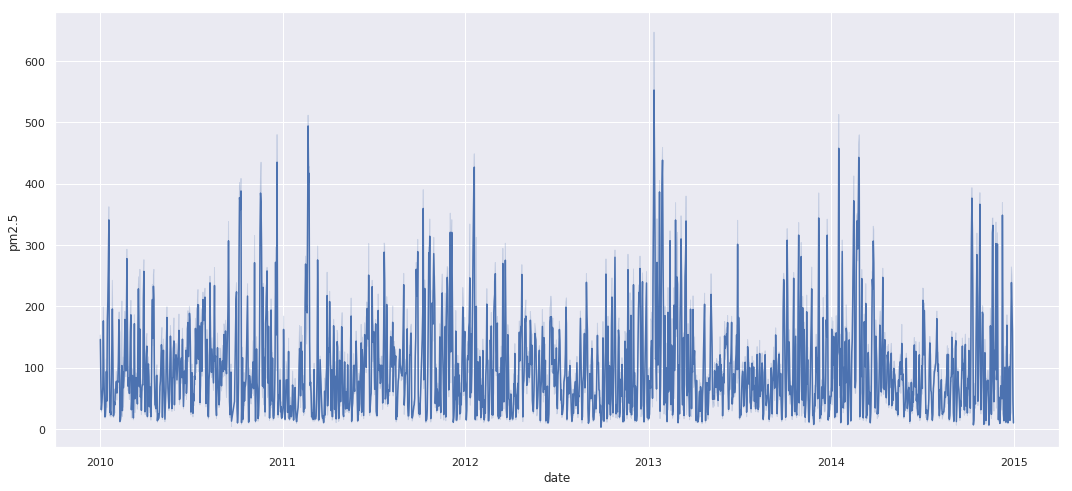

In [9]:
plt.rcParams['figure.figsize'] = [18 ,8]
sns.lineplot(data=data_refined, x="date", y="pm2.5")

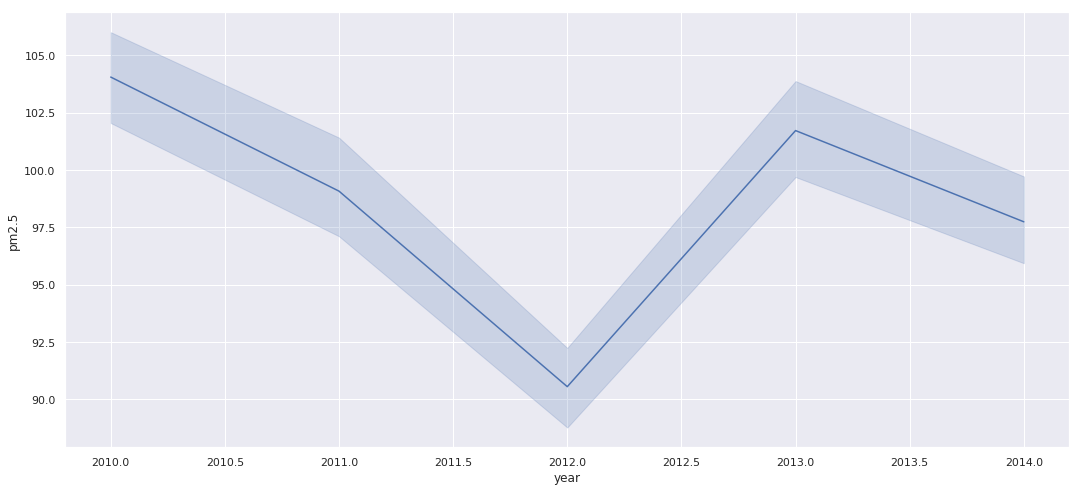

In [10]:
## year Vs pm2.5
sns.lineplot(data=data_refined,x="year", y="pm2.5") 


## might come under seasonality
## plot shows that 2013 saw the highest concentration of particulate matter

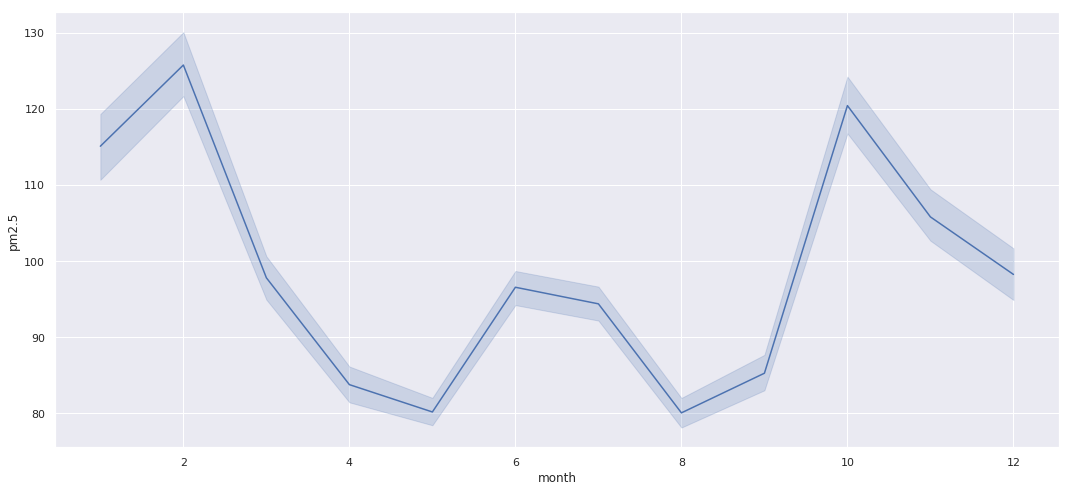

In [11]:
## month Vs pm2.5
plt.rcParams['figure.figsize'] = [18 ,8]

sns.lineplot(data=data_refined,x="month", y="pm2.5") 

## the concentration in January has spiked to high levels, i.e January 2013 saw increased levels of pm2.5
## as compared to other months.
## might come under the cateory of cyclcity

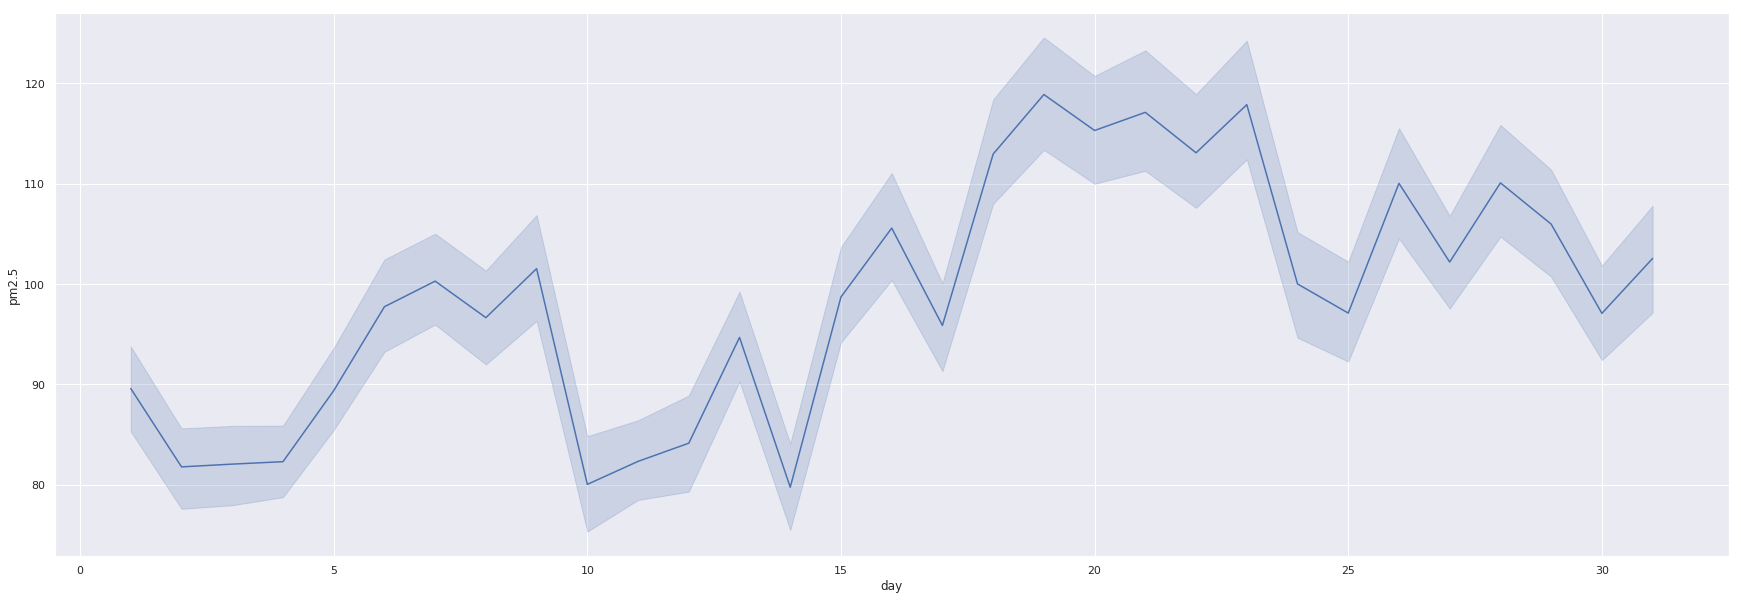

In [12]:
## day Vs pm2.5
plt.rcParams['figure.figsize'] = [30, 10]

sns.lineplot(data=data_refined,x="day", y="pm2.5") 

## the reference might come under irregularity

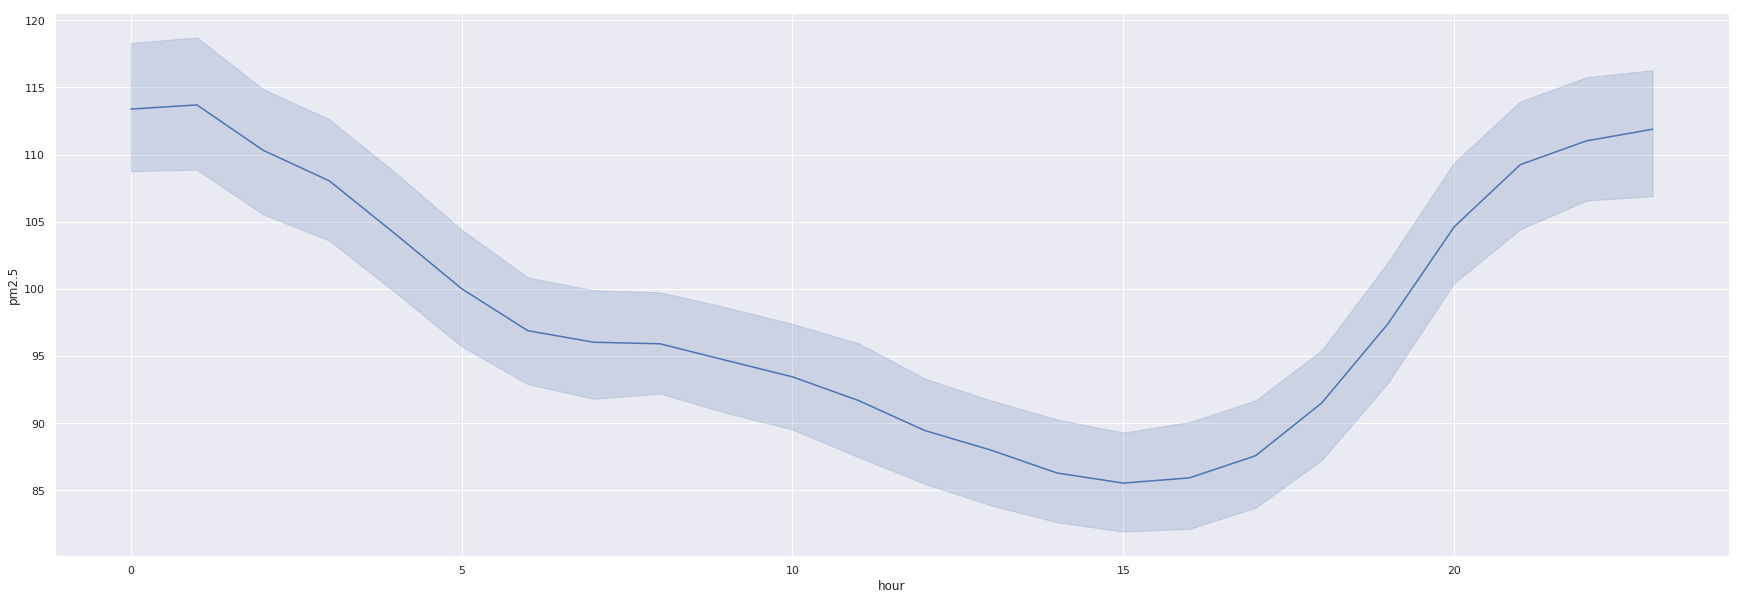

In [13]:
## month Vs pm2.5
plt.rcParams['figure.figsize'] = [30, 10]

sns.lineplot(data=data_refined,x="hour", y="pm2.5") 

## could come under seasonality
## this essentially shows a common trend with spikes between (0-2, 20-23) hours, which implies that the
## air quality from 9pm to 3am is at its worst. 
## This could be due to high trafic and may point to the other likely sources of pollution.

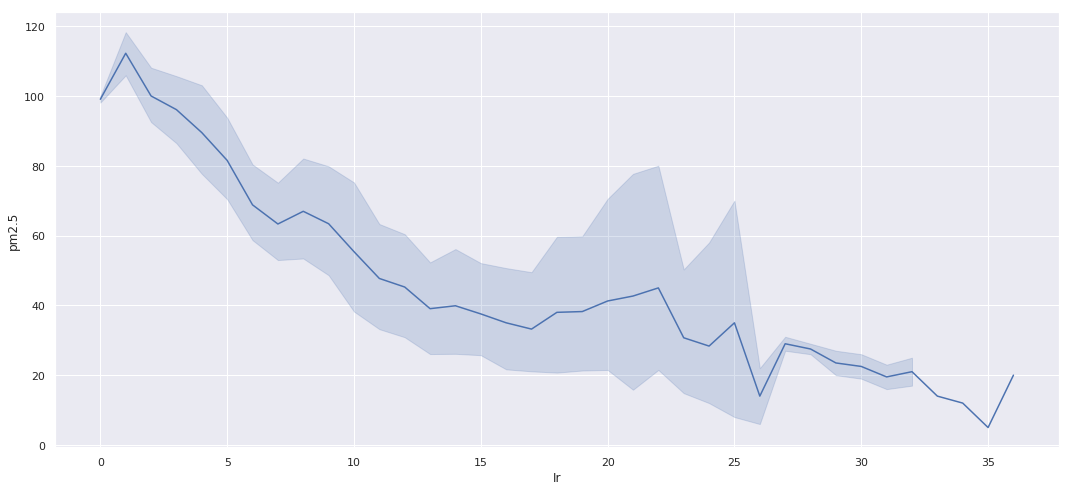

In [22]:
## Ir Vs pm2.5
## Ir: Cumulated hours of rain
plt.rcParams['figure.figsize'] = [18 ,8]
sns.lineplot(data=data_refined, x="Ir", y="pm2.5")

## shows a decreasing trend

In [16]:
## incomplete block of code.
## starting to correct the trend in Is and Ir values

df_trend = data_refined.iloc[:,11:13]
df_trend['pm2.5'] = data_refined['pm2.5']

length = len(df_trend.index)

for i in range(0,length):
    df_trend['MA(5)'] = df_trend.iloc[i:i+5, 0].sum()
print df_trend.iloc[0:10, 3]
print df_trend.iloc[0:10, 0]
 
print len(df_trend['MA(5)'])

24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
Name: MA(5), dtype: int64
24    0
25    0
26    0
27    1
28    2
29    3
30    4
31    0
32    0
33    0
Name: Is, dtype: int64
41757


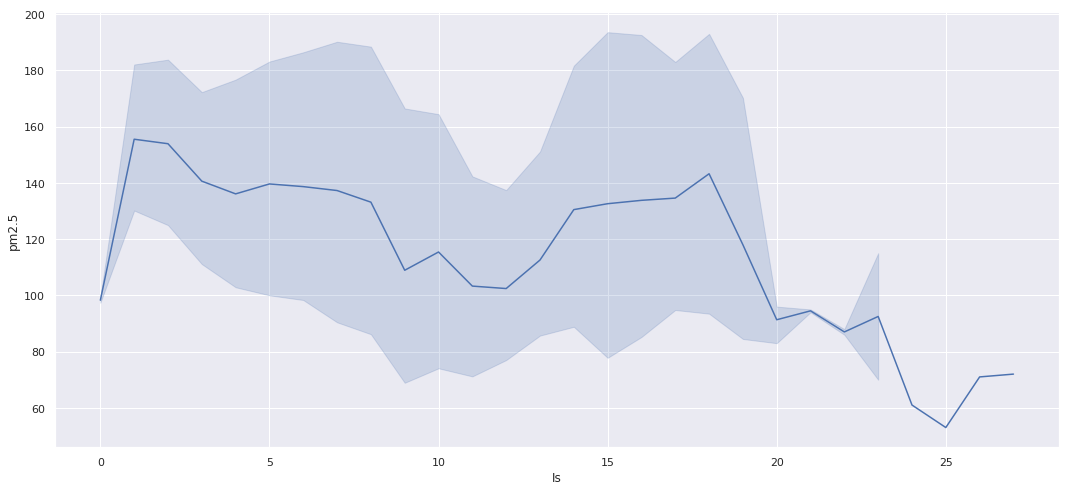

In [17]:
## Is Vs pm2.5

## Is: Cumulated hours of snow

plt.rcParams['figure.figsize'] = [18 ,8]
sns.lineplot(data=data_refined, x="Is", y="pm2.5")

## looks like irregularity
## might also be a decreasing trend

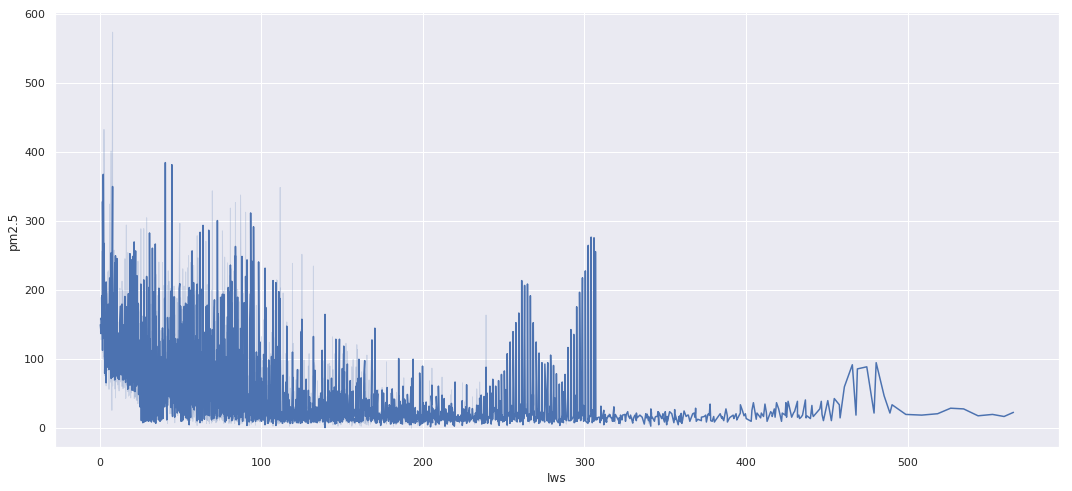

In [18]:
## Iws Vs pm2.5 

## Iws: Cumulated wind speed (m/s)

plt.rcParams['figure.figsize'] = [18 ,8]
sns.lineplot(data=data_refined, x="Iws", y="pm2.5")

## consists of some dampening effect

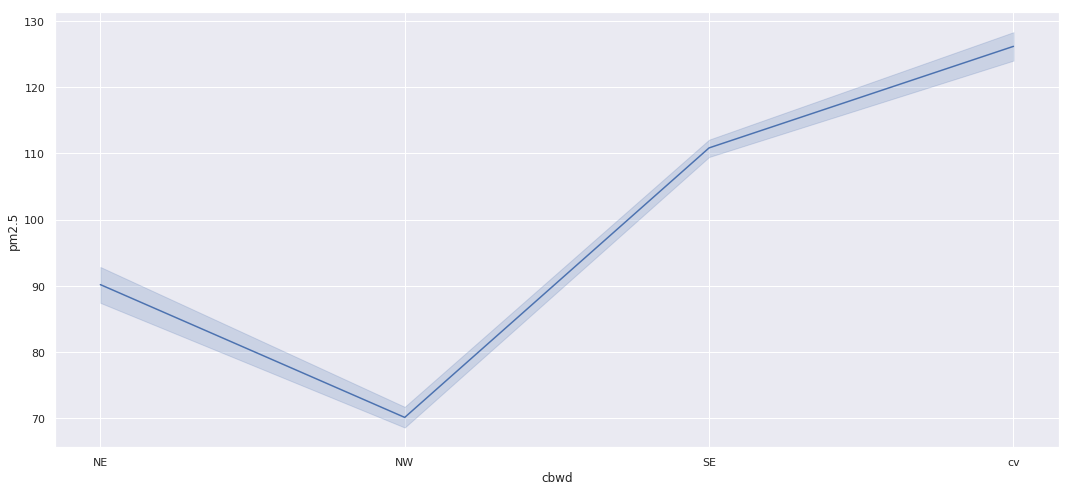

In [19]:
## cbwd Vs pm2.5

## cbwd: Combined wind direction

plt.rcParams['figure.figsize'] = [18 ,8]
sns.lineplot(data=data_refined, x="cbwd", y="pm2.5")

## this might come under seasonality

[Text(0,0.5,'pm2.5')]

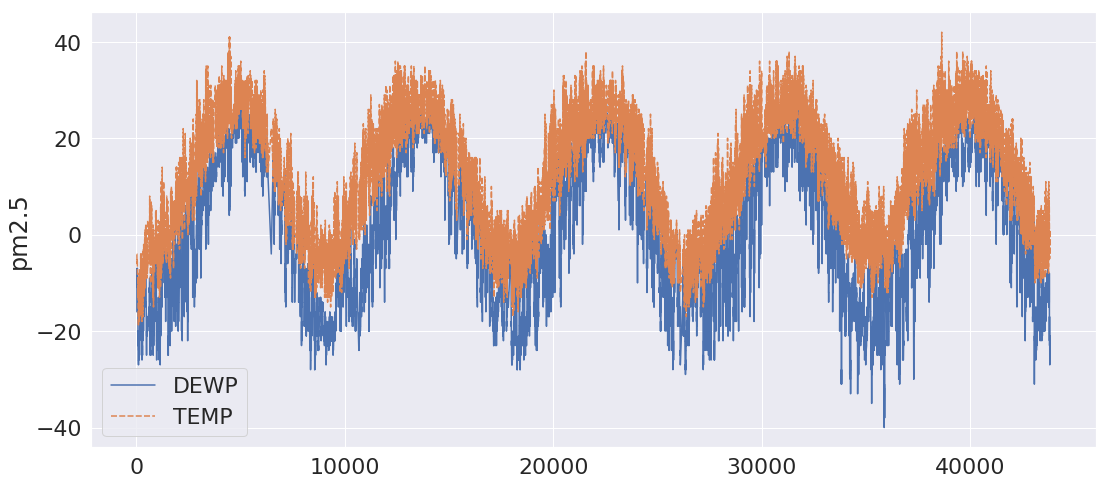

In [20]:
## making a combined lineplot

## DEWP: Dew Point (â„ƒ)
## TEMP: Temperature (â„ƒ)

sns.set(font_scale = 2)
df = data_refined.iloc[:,6:8]
plot = sns.lineplot(data=df)
plot.set(ylabel = "pm2.5")

## this is stationary data. No need for any changes.

In [21]:
print data_refined.head() ## removed the target columns for ease of computation.

    No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir  \
24  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0   
25  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0   
26  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0   
27  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0   
28  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0   

         date  
24 2010-01-02  
25 2010-01-02  
26 2010-01-02  
27 2010-01-02  
28 2010-01-02  


In [22]:
Y = data_refined['pm2.5']
data_refined.drop(['pm2.5'], 1 , inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
## use scikit learn for linear regression
from sklearn.linear_model import LinearRegression
import pandas as pd

X = data_refined.iloc[:,:]

X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)
#reg = LinearRegression().fit(X, y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

clf = LinearRegression().fit(X_train, y_train)
clf.score(X_train, y_train)

0.0606429671019284

In [25]:
## the score is only 25%, which is not so good. Have to fine tune the model parameters to get a better accuracy.